In [1]:
import torch, torchvision
from matplotlib import pyplot as plt
from torch import nn
from hw3_helpers import get_data, Classifier, evaluate, train_one_epoch
import pandas as pd
import numpy as np
from IPython.display import Image

/soft/datascience/conda/2023-10-04/mconda3/lib/python3.10/site-packages/torchvision/datapoints/__init__.py:12: UserWarning: The torchvision.datapoints and torchvision.transforms.v2 namespaces are still Beta. While we do not expect major breaking changes, some APIs may still change according to user feedback. Please submit any feedback you may have in this issue: https://github.com/pytorch/vision/issues/6753, and you can also check out https://github.com/pytorch/vision/issues/7319 to learn more about the APIs that we suspect might involve future changes. You can silence this warning by calling torchvision.disable_beta_transforms_warning().
  warnings.warn(_BETA_TRANSFORMS_WARNING)
/soft/datascience/conda/2023-10-04/mconda3/lib/python3.10/site-packages/torchvision/transforms/v2/__init__.py:54: UserWarning: The torchvision.datapoints and torchvision.transforms.v2 namespaces are still Beta. While we do not expect major breaking changes, some APIs may still change according to user feedback

Create training, validation and testing dataset objects

In [2]:
train_dataloader, val_dataloader = get_data()

/soft/datascience/conda/2023-10-04/mconda3/lib/python3.10/site-packages/torchvision/transforms/v2/_deprecated.py:41: UserWarning: The transform `ToTensor()` is deprecated and will be removed in a future release. Instead, please use `transforms.Compose([transforms.ToImageTensor(), transforms.ConvertImageDtype()])`.
  warnings.warn(


In [3]:
dev = torch.device("cuda") if torch.cuda.is_available() else torch.device("cpu")

Creating the bulding blocks of the model

Initialize the model, optimizer and loss function

In [4]:
n_initial_filters = 32; n_stages = 2; blocks_per_stage = 1
model = Classifier(n_initial_filters, n_stages, blocks_per_stage)
model.to(dev)
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.AdamW(model.parameters(), lr=1e-3, weight_decay=0.01)
# scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(optimizer, 'min', patience=4)

Training loop

In [5]:
%%time
epochs = 30
cols = ["train_loss", "train_acc", "val_loss", "val_acc"]
training_frame = {col: [] for col in cols}
n_step = 2
for j in range(epochs):
    train_one_epoch(train_dataloader, model, loss_fn, optimizer)
    train_acc, train_loss = evaluate(train_dataloader, model, loss_fn) 
    print(f"Epoch {j}: train loss: {train_loss:.3f}, accuracy: {train_acc:.3f}" )
    val_acc, val_loss = evaluate(val_dataloader, model, loss_fn)
    # # scheduler.step(val_loss)
    # if j>n_step:
    #     # avg_train_los = np.mean(training_frame["train_loss"][-(1+n_step):-1])
    #     val_convg = np.max(training_frame["val_loss"][-(1+n_step):-1]) - np.min(training_frame["val_loss"][-(1+n_step):-1])
    #     print(val_convg)
    #     if val_convg<1e-2:
    #         print(f"decreased lr, lr was {param_group['lr']}")
    #         for param_group in optimizer.param_groups:
    #             param_group['lr'] /= 0.1
    print(f"Epoch {j}: validation loss: {val_loss:.3f}, accuracy: {val_acc:.3f}")
    training_frame["train_loss"].append(train_loss), training_frame["train_acc"].append(train_acc)
    training_frame["val_loss"].append(val_loss), training_frame["val_acc"].append(val_acc)

Epoch 0: train loss: 1.738, accuracy: 35.990
Epoch 0: validation loss: 1.734, accuracy: 35.651
Epoch 1: train loss: 1.588, accuracy: 41.626
Epoch 1: validation loss: 1.582, accuracy: 41.327
Epoch 2: train loss: 1.473, accuracy: 46.336
Epoch 2: validation loss: 1.468, accuracy: 46.440
Epoch 3: train loss: 1.376, accuracy: 50.195
Epoch 3: validation loss: 1.383, accuracy: 49.713
Epoch 4: train loss: 1.340, accuracy: 51.587
Epoch 4: validation loss: 1.344, accuracy: 50.663
Epoch 5: train loss: 1.312, accuracy: 52.611
Epoch 5: validation loss: 1.311, accuracy: 52.710
Epoch 6: train loss: 1.242, accuracy: 55.379
Epoch 6: validation loss: 1.252, accuracy: 54.420
Epoch 7: train loss: 1.182, accuracy: 57.685
Epoch 7: validation loss: 1.192, accuracy: 56.250
Epoch 8: train loss: 1.154, accuracy: 58.526
Epoch 8: validation loss: 1.173, accuracy: 56.863
Epoch 9: train loss: 1.126, accuracy: 59.402
Epoch 9: validation loss: 1.147, accuracy: 58.515
Epoch 10: train loss: 1.090, accuracy: 61.115
Epoc

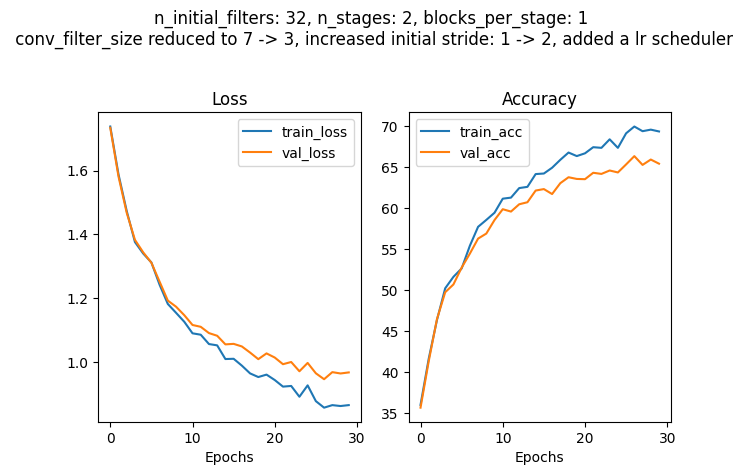

In [6]:
training_frame = pd.DataFrame(training_frame)
fig, axs = plt.subplots(ncols=2)
title = f"n_initial_filters: {n_initial_filters}, n_stages: {n_stages}, blocks_per_stage: {blocks_per_stage}"
title += "\n conv_filter_size reduced to 7 -> 3, increased initial stride: 1 -> 2, added a lr scheduler\n"
plt.suptitle(title)
training_frame.plot(y=["train_loss", "val_loss"], ax=axs[0], xlabel='Epochs', title="Loss")
training_frame.plot(y=["train_acc", "val_acc"], ax=axs[1], xlabel='Epochs', title="Accuracy")
plt.tight_layout()
plt.show(fig)
plot = f'nif={n_initial_filters}_nstg={n_stages}_blks={blocks_per_stage}_lr_schedule'
fig.savefig(f'{plot}.png')

In [7]:
# training_frame = pd.DataFrame(training_frame)
# fig, axs = plt.subplots(ncols=2)
# title = f"n_initial_filters: {n_initial_filters}, n_stages: {n_stages}, blocks_per_stage: {blocks_per_stage}"
# title += "\n conv_filter_size reduced to 7 -> 3, increased initial stride: 1 -> 2"
# plt.suptitle(title)
# training_frame.plot(y=["train_loss", "val_loss"], ax=axs[0], xlabel='Epochs', title="Loss")
# training_frame.plot(y=["train_acc", "val_acc"], ax=axs[1], xlabel='Epochs', title="Accuracy")
# plt.show(fig)
# plot = f'nif={n_initial_filters}_nstg={n_stages}_blks={blocks_per_stage}_2'
# fig.savefig(f'{plot}.png')

In [8]:
#original model
# 64, 4, 2
string = """These are the results of the original model. 
Clearly, the model is overfitting as the validation_accuracy has saturated at value smaller than training_accuracy."""
print(string)
Image("original_model.png")


These are the results of the original model. 
Clearly, the model is overfitting as the validation_accuracy has saturated at value smaller than training_accuracy.


FileNotFoundError: No such file or directory: 'original_model.png'

FileNotFoundError: No such file or directory: 'original_model.png'

<IPython.core.display.Image object>

To reduce overfitting, we reduce the num_parameters in the model by:
1.) Halving the intial_filters from 64 to 32
2.) Halving the number of stages from 4 to 2
Clearly, the model is still overfitting as the validation_accuracy has saturated at value smaller than training_accuracy.


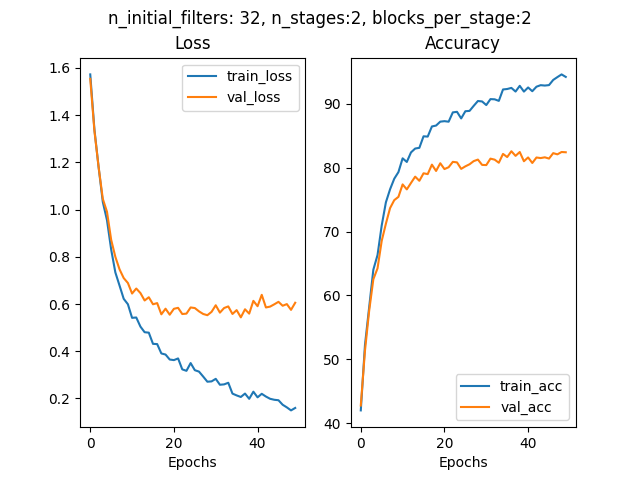

In [9]:
#num_initial_filers halved, num_stages halved
string = """To reduce overfitting, we reduce the num_parameters in the model by:
1.) Halving the intial_filters from 64 to 32
2.) Halving the number of stages from 4 to 2
Clearly, the model is still overfitting as the validation_accuracy has saturated at value smaller than training_accuracy."""
print(string)
Image("reduced_size_1.png")